In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image

(1700, 64, 64, 3)
(64, 64, 3)


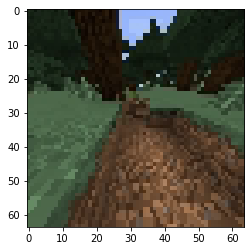

In [4]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
hard_test = np.array(file[-1792:][150]).astype(np.float32)/255.
file = np.array(file[-1792:][:1700]).astype(np.uint8)
print(file.shape)
#for i in range(len(file)):
    #processed = np.append(np.array(Image.fromarray(file[i], "RGB").convert("L")), processed)
processed = file.reshape(1700, 64, 64, 3)
test = processed[-1]
test = test.reshape(-1,64,64,3)
processed = processed[:-1]
test = test.reshape(-1,64,64,3).astype(np.float32)/255.
processed = processed.astype(np.float32)/255.
print(processed[0].shape)
plt.imshow(processed[-1])

In [64]:
#All credits goes to https://github.com/kimbring2/DQFD_Minecraft/blob/master/MineRL_Navigate_DQN.ipynb
#and to VCode1243; without them both this would never have been possible
mem_in = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=[8,8], strides=[2,2], padding="same",
                       activation = "tanh"),
    keras.layers.Conv2D(64, kernel_size=[4,4], strides=[1,1], padding="same",
                       activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=[2,2], strides=[1,1], padding="same",
                       activation = "relu"),
    keras.layers.Flatten(),
    #50 p values
    keras.layers.Dense(50)
])

mem_out = keras.models.Sequential([
    keras.layers.Dense(64*64*3),
    keras.layers.Reshape([64,64,3]),
    keras.layers.Conv2DTranspose(3, kernel_size=[5,5], strides=[1,1], padding="same", activation="sigmoid"),
])

mem_autoencode = keras.models.Sequential([mem_in, mem_out])
mem_autoencode.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history = mem_autoencode.fit(processed, processed, epochs=10, validation_data=(test, test), shuffle=True)
mem_autoencode.summary()

Epoch 1/10
54/54 [==============================] - 34s 639ms/step - loss: 0.5714 - val_loss: 0.5419
Epoch 2/10
54/54 [==============================] - 40s 743ms/step - loss: 0.5547 - val_loss: 0.5431
Epoch 3/10
54/54 [==============================] - 39s 719ms/step - loss: 0.5308 - val_loss: 0.5328
Epoch 4/10
54/54 [==============================] - 40s 740ms/step - loss: 0.5204 - val_loss: 0.5248
Epoch 5/10
54/54 [==============================] - 42s 781ms/step - loss: 0.5144 - val_loss: 0.5233
Epoch 6/10
54/54 [==============================] - 38s 701ms/step - loss: 0.5108 - val_loss: 0.5160
Epoch 7/10
54/54 [==============================] - 41s 755ms/step - loss: 0.5143 - val_loss: 0.5043
Epoch 8/10
54/54 [==============================] - 38s 695ms/step - loss: 0.5077 - val_loss: 0.5001
Epoch 9/10
54/54 [==============================] - 31s 572ms/step - loss: 0.5062 - val_loss: 0.5058
Epoch 10/10
54/54 [==============================] - 33s 607ms/step - loss: 0.5050 - val_lo

Original image:


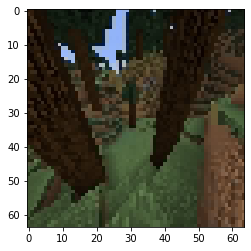

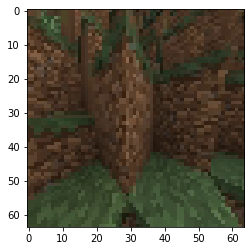

AI vision:


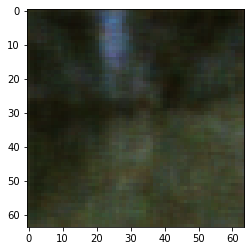

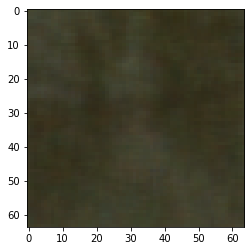

In [71]:
image = np.array(mem_autoencode.predict(processed[100].reshape(-1,64,64,3))).astype(np.float32)
second_img = np.array(mem_autoencode.predict(processed[0].reshape(-1,64,64,3))).astype(np.float32)
#Original image
print("Original image:")
plt.imshow(processed[0].reshape(64,64,3))
plt.show()
plt.imshow(processed[100].reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(second_img.reshape(64,64,3))
plt.show()
plt.imshow(image.reshape(64,64,3))
plt.show()

In [477]:
cnn_encoder = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=2, strides=1, padding="same", activation="tanh", input_shape=[64,64,3]),
    keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="tanh"),
    keras.layers.Conv2D(32, kernel_size=5, strides=2, padding="same", activation="tanh"),
    keras.layers.Flatten(),
    keras.layers.Dense(100),
    keras.layers.Dense(50)
])

cnn_decoder = keras.models.Sequential([
    #keras.layers.Conv2DTranspose(32, kernel_size=3, strides=1, padding="same", activation="tanh", input_shape=[16,16,128]),
    #keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="tanh"),
    #keras.layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding="same", activation="tanh"),
    #keras.layers.Flatten(),
    keras.layers.Dense(100, activation="tanh", input_shape=[50]),
    keras.layers.Dense(64*64*3, activation="tanh"),
    keras.layers.Reshape([64,64,3]),
    keras.layers.Conv2DTranspose(3, kernel_size=5, strides=1, padding="same", activation="sigmoid")
])

cnn_autoencoder = keras.models.Sequential([cnn_encoder, cnn_decoder])  

#for layer in cnn_encoder.layers:
    #print(layer.get_output_at(0).get_shape().as_list())
    
#for layer in cnn_decoder.layers:
    #print(layer.get_output_at(0).get_shape().as_list())

cnn_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history = cnn_autoencoder.fit(processed, processed, epochs=100, validation_data=(test, test))
cnn_autoencoder.summary()

Epoch 1/100
4/4 [==============================] - 3s 715ms/step - loss: 0.6663 - val_loss: 0.5969
Epoch 2/100
4/4 [==============================] - 2s 398ms/step - loss: 0.6060 - val_loss: 0.5591
Epoch 3/100
4/4 [==============================] - 2s 466ms/step - loss: 0.5846 - val_loss: 0.5406
Epoch 4/100
4/4 [==============================] - 2s 397ms/step - loss: 0.5755 - val_loss: 0.5303
Epoch 5/100
4/4 [==============================] - 2s 387ms/step - loss: 0.5714 - val_loss: 0.5252
Epoch 6/100
4/4 [==============================] - 2s 379ms/step - loss: 0.5699 - val_loss: 0.5235
Epoch 7/100
4/4 [==============================] - 2s 389ms/step - loss: 0.5694 - val_loss: 0.5220
Epoch 8/100
4/4 [==============================] - 2s 398ms/step - loss: 0.5692 - val_loss: 0.5209
Epoch 9/100
4/4 [==============================] - 2s 395ms/step - loss: 0.5690 - val_loss: 0.5207
Epoch 10/100
4/4 [==============================] - 2s 380ms/step - loss: 0.5690 - val_loss: 0.5203
Epoch 11/

4/4 [==============================] - 2s 432ms/step - loss: 0.5376 - val_loss: 0.5145
Epoch 84/100
4/4 [==============================] - 2s 441ms/step - loss: 0.5375 - val_loss: 0.5144
Epoch 85/100
4/4 [==============================] - 2s 435ms/step - loss: 0.5373 - val_loss: 0.5143
Epoch 86/100
4/4 [==============================] - 2s 431ms/step - loss: 0.5372 - val_loss: 0.5147
Epoch 87/100
4/4 [==============================] - 2s 434ms/step - loss: 0.5370 - val_loss: 0.5144
Epoch 88/100
4/4 [==============================] - 2s 437ms/step - loss: 0.5368 - val_loss: 0.5141
Epoch 89/100
4/4 [==============================] - 2s 482ms/step - loss: 0.5365 - val_loss: 0.5147
Epoch 90/100
4/4 [==============================] - 2s 486ms/step - loss: 0.5363 - val_loss: 0.5137
Epoch 91/100
4/4 [==============================] - 2s 460ms/step - loss: 0.5360 - val_loss: 0.5139
Epoch 92/100
4/4 [==============================] - 2s 436ms/step - loss: 0.5358 - val_loss: 0.5139
Epoch 93/100


In [39]:
image = cnn_autoencoder.predict(processed[0].reshape(-1,64,64,3))
#Original image
print("Original image:")
plt.imshow(processed[0].reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(image.reshape(64,64,3))
plt.show()

NameError: name 'cnn_autoencoder' is not defined

(1792, 64, 64, 3)
(64, 64, 3)


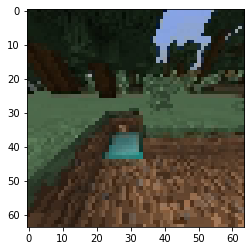

In [11]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
file = np.array(file[-1792:][:]).astype(np.uint8)
print(file.shape)
processed = file.reshape(1792, 64, 64, 3)
processed = processed[:-1]
test = processed[-1]
test = test.reshape(-1,64,64,3).astype(np.float32)/255.
processed = processed.astype(np.float32)/255.
print(processed[0].shape)
plt.imshow(processed[-1])

float32
<PrefetchDataset shapes: (32, 64, 64, 3), types: tf.float32>
0
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


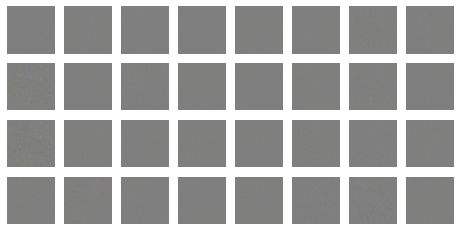

1
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


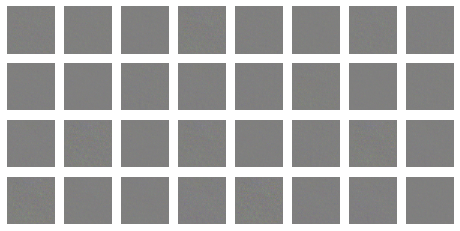

2
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


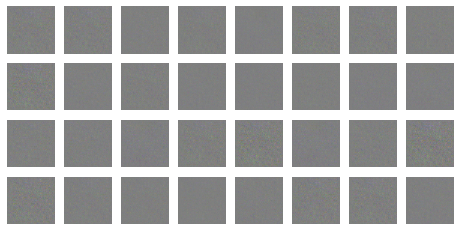

3
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


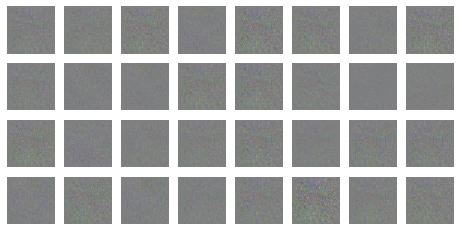

4
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


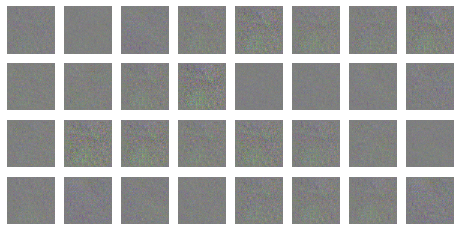

5
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


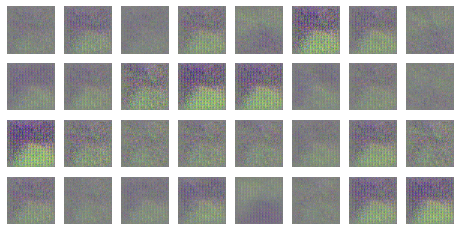

6
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


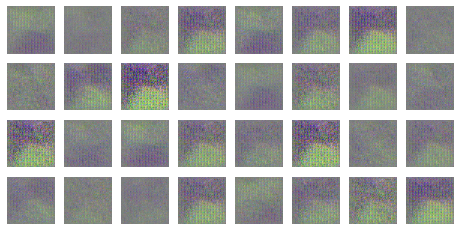

7
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


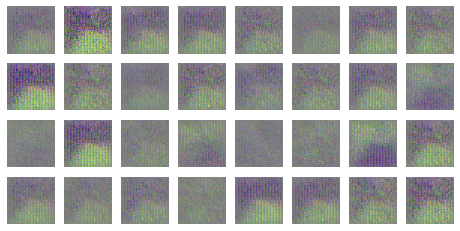

8
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


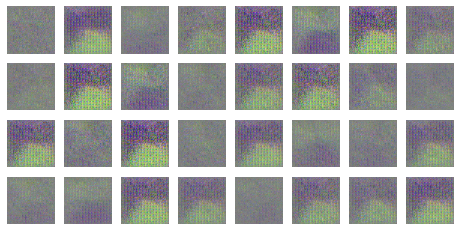

9
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


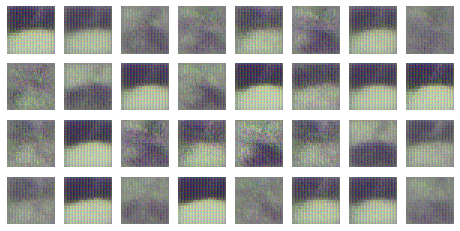

In [60]:
cnn_codings = 200

cnn_gen = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[cnn_codings]),
    keras.layers.GaussianNoise(stddev=0.2),
    keras.layers.Reshape([1, 100]),
    keras.layers.LSTM(200, return_sequences=True),
    keras.layers.Dense(16*16*128),
    keras.layers.Dropout(0.4),
    keras.layers.Reshape([16,16,128]),
    keras.layers.Conv2D(64, kernel_size=5, padding="same", 
                       activation="tanh"),
    keras.layers.GaussianNoise(stddev=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same",
                                activation="tanh"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(3, kernel_size=2, strides=2, padding="same", 
                                 activation="sigmoid"),
])
'''keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2), 
                       input_shape=[64,64,3]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.TimeDistributed(keras.layers.Dense(1, activation="sigmoid"))'''
cnn_dis = keras.models.Sequential([
    
    keras.layers.Flatten(),
    keras.layers.Dense(100),
    keras.layers.Reshape([1, 100]),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1, activation="sigmoid"))
])

cnn_gan = keras.models.Sequential([cnn_gen, cnn_dis])
cnn_dis.compile(loss="binary_crossentropy", optimizer="rmsprop")
cnn_dis.trainable = False
cnn_gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

batch_size = 32

processed = np.array(processed).reshape(-1,64,64,3)
dataset = tf.data.Dataset.from_tensor_slices(processed)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

print(processed.dtype)
print(dataset)

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=10):
    cnn_gen, cnn_dis = cnn_gan.layers
    for epoch in range(n_epochs):
        print(epoch)
        for X_batch in dataset:
            
            #training the discriminator
            X_batch = tf.cast(X_batch, tf.float32)
            noise = tf.random.normal(shape=[batch_size,codings_size])
            generated_images = cnn_gen(noise)
            
            #print(generated_images[0][0][0])
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            #print(X_fake_and_real.shape)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            print(y1.shape)
            cnn_dis.trainable = True
            cnn_dis.train_on_batch(X_fake_and_real, y1)
            
            #training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            cnn_dis.trainable = False
            cnn_gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                    
        plt.show()
        
train_gan(cnn_gan, dataset, batch_size, cnn_codings)

In [53]:
import cv2

0
AI vision:


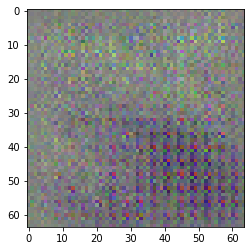

1
(64, 200)
AI vision:


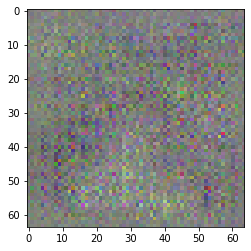

2
(64, 200)
AI vision:


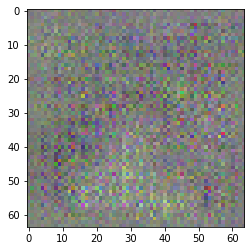

3
(64, 200)
AI vision:


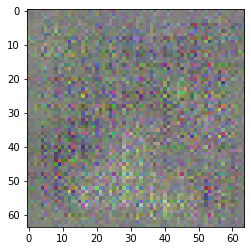

4
(64, 200)
AI vision:


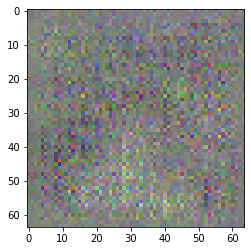

5
(64, 200)
AI vision:


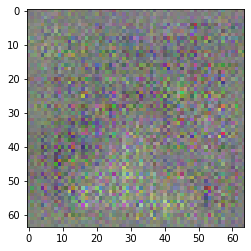

6
(64, 200)
AI vision:


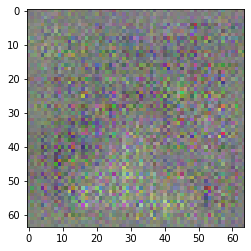

7
(64, 200)
AI vision:


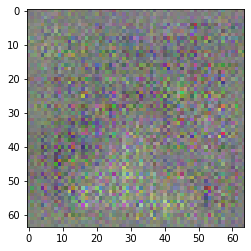

8
(64, 200)
AI vision:


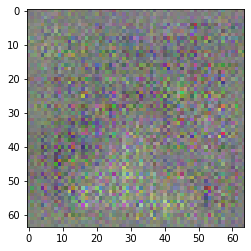

9
(64, 200)
AI vision:


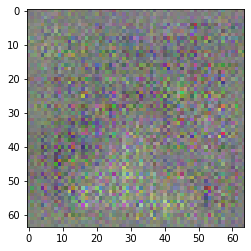

10
(64, 200)
AI vision:


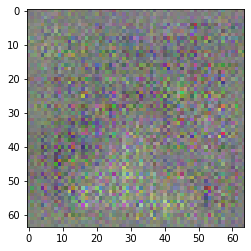

11
(64, 200)


KeyboardInterrupt: 

In [76]:
#encoder
encoder = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.GaussianNoise(stddev = 0.1),
    keras.layers.Dense(cnn_codings),
    keras.layers.BatchNormalization()
])
#GAN tester
noise = tf.random.normal(shape=[batch_size, cnn_codings])
imgs = []

video = cv2.VideoWriter("FIRST_DREAM.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 20, (64,64))
for i in range(200):
    print(i)
    if i == 0:
        gan_img = cnn_gen.predict(noise)[0]
    else:
        prev_img = encoder.predict(imgs[-1])
        print(prev_img.shape)
        gan_img = cnn_gen.predict(prev_img)[0]
    imgs.append(gan_img)
    print("AI vision:")
    plt.imshow(gan_img.reshape(64,64,3))
    plt.show()
    video.write(gan_img)

video.release()

print("Original image:")
plt.imshow(processed[0].reshape(64,64,3))
plt.show()